In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import spectral
from scipy.io import loadmat
import os
from HSI_class import HSI

# Check if GPU is available
print("GPU Available:", torch.cuda.is_available())

# If available, print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU Available: True
GPU Name: NVIDIA GeForce GTX 1650


In [2]:
dataset_path = "Hyperspectral oil spill detection datasets"

dataset = []

i = 0
for filename in os.listdir(dataset_path):
    if i > 3:
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        dataset.append(hsi)
    i += 1

Processing file: Hyperspectral oil spill detection datasets\GM01.mat
Processing file: Hyperspectral oil spill detection datasets\GM02.mat
Processing file: Hyperspectral oil spill detection datasets\GM03.mat
Processing file: Hyperspectral oil spill detection datasets\GM04.mat


In [3]:
for hsi in dataset:
    print(f'{hsi.name}: {hsi.img.shape}')

GM01: (1243, 684, 224)
GM02: (1786, 699, 224)
GM03: (1386, 690, 224)
GM04: (1466, 676, 224)


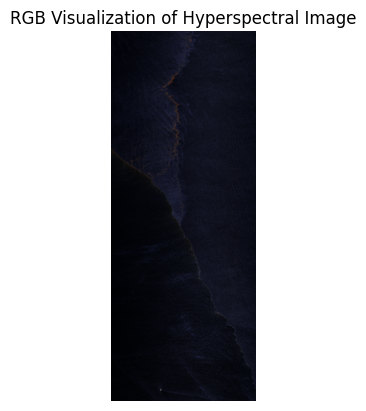

In [4]:
img = dataset[1].img
gt = dataset[1].gt
r_band = 31  # Red (around 660 nm) https://www.indexdatabase.de/db/s-single.php?id=28
g_band = 22  # Green (around 560 nm)
b_band = 10 # Blue (around 450 nm)

red_band = img[:, :, r_band]  # Adjust band index for red
green_band = img[:, :, g_band]  # Adjust band index for green
blue_band = img[:, :, b_band]  # Adjust band index for blue

# Normalize bands to range 0-1 for proper visualization
red_band = (red_band - np.min(red_band)) / (np.max(red_band) - np.min(red_band))
green_band = (green_band - np.min(green_band)) / (np.max(green_band) - np.min(green_band))
blue_band = (blue_band - np.min(blue_band)) / (np.max(blue_band) - np.min(blue_band))

rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Visualization of Hyperspectral Image")
plt.axis('off')
plt.show()

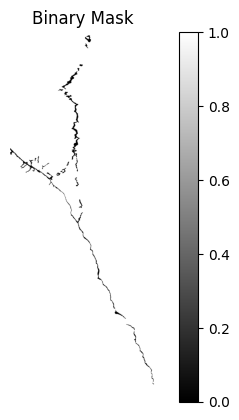

In [5]:
# Visualize the binary mask
plt.imshow(1 - gt, cmap='gray')  # Use 'gray' for binary visualization
plt.colorbar()
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [6]:
import createSample as CS
hsi_ = dataset[0]
patch_size = 9
sample_per_class = 20
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_, patch_size, sample_per_class)

hsi shape
(1243, 684, 224)
20 Randomly chosen 0 indices: [(np.int64(1215), np.int64(160)), (np.int64(993), np.int64(371)), (np.int64(252), np.int64(592)), (np.int64(740), np.int64(168)), (np.int64(914), np.int64(3)), (np.int64(515), np.int64(263)), (np.int64(582), np.int64(142)), (np.int64(1192), np.int64(683)), (np.int64(336), np.int64(567)), (np.int64(1104), np.int64(216)), (np.int64(833), np.int64(347)), (np.int64(112), np.int64(391)), (np.int64(720), np.int64(10)), (np.int64(99), np.int64(636)), (np.int64(51), np.int64(148)), (np.int64(32), np.int64(597)), (np.int64(947), np.int64(584)), (np.int64(36), np.int64(422)), (np.int64(333), np.int64(656)), (np.int64(1143), np.int64(674))]
20 Randomly chosen 1 indices: [(np.int64(541), np.int64(425)), (np.int64(473), np.int64(489)), (np.int64(108), np.int64(604)), (np.int64(94), np.int64(607)), (np.int64(234), np.int64(226)), (np.int64(458), np.int64(598)), (np.int64(1180), np.int64(138)), (np.int64(572), np.int64(640)), (np.int64(890), np

In [7]:
i =12
half_patch = patch_size // 2
print(hsi_.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-177 -162  329  381  426  558  645  660  655  628  591  552  493  452
  421  384  366  337  310  280  256  233  210  190  168  155  140  129
  119  112  103   98   95   89   79   64   50   40   37   -2   19   35
   40    7   25   31   24   21   17   -5    0   12   23   20   23   15
   13   -4  -17  -19  -18  -98 -114 -110  -20   -4    5    8   10   13
   13   11   13    8    9    4    0   -2  -13  -44 -114 -115 -134 -134
  -49  -16   -9  -12  -12  -19   -8   -3   -2    0    1    0    0   32
   17   16   10   18   -2  -32  -38  -53  -85    0    0    0    0    0
    0  -72  -47  -35  -86  -52  -62  -61  -21   -4    5   12   11   11
   20   20   20   19   21   20   24   18   20   18   18   22   17   13
   15   20   16    8   14    8   11    3    0   -5  -39  -20   11    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  -13   -9  -14  -10   -1   -4  -20  -16    3    6    8    5    3    7
    7    6   10    4    7    4    9   11    9    9   11   17   12   11
   12 

In [8]:
print(f"selected patch 0: {selected_patch_0.shape}")
print(f"selected patch 1: {selected_patch_1.shape}")

print(random_indices_0)
print(random_indices_1)

selected patch 0: (20, 9, 9, 224)
selected patch 1: (20, 9, 9, 224)
[(np.int64(1215), np.int64(160)), (np.int64(993), np.int64(371)), (np.int64(252), np.int64(592)), (np.int64(740), np.int64(168)), (np.int64(914), np.int64(3)), (np.int64(515), np.int64(263)), (np.int64(582), np.int64(142)), (np.int64(1192), np.int64(683)), (np.int64(336), np.int64(567)), (np.int64(1104), np.int64(216)), (np.int64(833), np.int64(347)), (np.int64(112), np.int64(391)), (np.int64(720), np.int64(10)), (np.int64(99), np.int64(636)), (np.int64(51), np.int64(148)), (np.int64(32), np.int64(597)), (np.int64(947), np.int64(584)), (np.int64(36), np.int64(422)), (np.int64(333), np.int64(656)), (np.int64(1143), np.int64(674))]
[(np.int64(541), np.int64(425)), (np.int64(473), np.int64(489)), (np.int64(108), np.int64(604)), (np.int64(94), np.int64(607)), (np.int64(234), np.int64(226)), (np.int64(458), np.int64(598)), (np.int64(1180), np.int64(138)), (np.int64(572), np.int64(640)), (np.int64(890), np.int64(8)), (np.int

In [9]:
indices = random_indices_0 +  random_indices_1

# Concatenating along axis 0
x_train = np.concatenate((selected_patch_0, selected_patch_1), )

y_train = np.array([])

gt = hsi_.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_train = np.append(y_train, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_train == 0)  # Count elements equal to 0
print(f'number of element equal 0 {count}')

count = np.count_nonzero(y_train == 1)  # Count elements equal to 1
print(f'number of element equal 1 {count}')


# print(y_train) 


# Print shape to verify
print(f"x_train shape: {x_train.shape}")  # Expected output: (10, 9, 9, 224)
print(f"y_train shape: {y_train.shape}") 


number of element equal 0 20
number of element equal 1 20
x_train shape: (40, 9, 9, 224)
y_train shape: (40,)


In [10]:
# Augmentation
import augmentation as aug

n_category = 2
band_size = 224
num_per_category = 200

data_augment1, label_augment1 = aug.Augment_data(x_train, y_train, n_category, patch_size, band_size, num_per_category)

data_augment2, label_augment2 = aug.Augment_data2(x_train, y_train, n_category, patch_size, band_size)

print(f"hasil augmentasi 1 shape: {data_augment1.shape}")
print(f"label augmentai 1 shape: {label_augment1.shape}")

print(f"hasil augmentasi 2 shape: {data_augment2.shape}")
print(f"label augmentasi 2 shape: {label_augment2.shape}")

# print(label_augment1)
# print(label_augment2)

# Count occurrences of each unique element
counts1 = np.bincount(label_augment1)

# Print results
for i, count in enumerate(counts1):
    print(f"Element {i} occurs {count} times.")

counts2 = np.bincount(label_augment2)

# Print results
for i, count in enumerate(counts2):
    print(f"Element {i} occurs {count} times.")

j:  400
hasil augmentasi 1 shape: (400, 9, 9, 224)
label augmentai 1 shape: (400,)
hasil augmentasi 2 shape: (400, 9, 9, 224)
label augmentasi 2 shape: (400,)
Element 0 occurs 200 times.
Element 1 occurs 200 times.
Element 0 occurs 200 times.
Element 1 occurs 200 times.


In [11]:
data_augment = np.concatenate((data_augment1, data_augment2))
label_augment = np.concatenate((label_augment1, label_augment2))

print(f"hasil augmentasi gabungan untuk training: {data_augment.shape}")
print(f"label augmentasi gabungan: {label_augment.shape}")

# print(label_augment)

# Count occurrences of each unique element
counts = np.bincount(label_augment)

# Print results
for i, count in enumerate(counts):
    print(f"Element {i} occurs {count} times.")

hasil augmentasi gabungan untuk training: (800, 9, 9, 224)
label augmentasi gabungan: (800,)
Element 0 occurs 400 times.
Element 1 occurs 400 times.


In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import vgg16

In [14]:
class VGG16_HSI(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG16_HSI, self).__init__()

         # Custom Convolutional Layer: Process 9x9x224 input
        self.pre_conv = nn.Sequential(
            nn.Conv2d(in_channels=224, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.AdaptiveAvgPool2d((1, 1))  # Reduce to (256, 1, 1)
        )

        # Fully Connected Layer to reshape to (64, 56, 56)
        self.fc = nn.Linear(256 * 1 * 1, 64 * 56 * 56)

        # Load VGG-16 Model
        self.vgg = vgg16(pretrained=True)

        # Remove first VGG-16 conv layer
        self.vgg.features = nn.Sequential(*list(self.vgg.features.children())[1:])

        # Modify classifier to output 2 classes
        self.vgg.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        # print(f'before {x.shape}')
        x = self.pre_conv(x)  # Process hyperspectral input
        x = x.view(x.size(0), -1)  # Flatten

        # print(f'after preconv {x.shape}')
        x = self.fc(x)  # Fully connected layer
        # print(f'after fc {x.shape}')
        # Reshape to (batch_size, 64, 56, 56) before passing to VGG
        x = x.view(x.size(0), 64, 56, 56)
        # print(f'after reshape, before vgg second layer {x.shape}')

        x = self.vgg.features(x)  # Pass to VGG-16
        x = self.vgg.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.vgg.classifier(x)  # Final classification layer

        return x


In [15]:
# Example usage
print("creating model...")
model = VGG16_HSI()
print("model created")

print(model)

creating model...


c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model created
VGG16_HSI(
  (pre_conv): Sequential(
    (0): Conv2d(224, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Linear(in_features=256, out_features=200704, bias=True)
  (vgg): VGG(
    (features): Sequential(
      (0): ReLU(inplace=True)
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU(inplace=True)
      (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(

In [16]:
test = data_augment[0]
test = torch.tensor(test)
test = test.to(torch.float32)
test = test.unsqueeze(0)

input = test
input = input.permute(0, 3, 1, 2)

print(f"input shape: {input.shape}")

# Pass the input through the model
output = model(input)

# Print the output shape
print("Output Shape:", output.shape)

output_value = output.detach().numpy() 
print(f"output value: {output_value}")

input shape: torch.Size([1, 224, 9, 9])
Output Shape: torch.Size([1, 2])
output value: [[ 0.22346038 -0.29022986]]


In [17]:
from torch.utils.data import Dataset, DataLoader


X_train = data_augment
X_train = torch.tensor(X_train)
X_train = X_train.to(torch.float32)
X_train = X_train.permute(0, 3, 1, 2)
print(f"X_train shape: {X_train.shape}")

y_train = torch.tensor(label_augment)

print(f"y_train shape: {y_train.shape}")


X_train shape: torch.Size([800, 224, 9, 9])
y_train shape: torch.Size([800])


In [18]:
# Generate validation data
hsi_val = dataset[1]
patch_size = 9
sample_per_class = 500
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_val, patch_size, sample_per_class)


hsi shape
(1786, 699, 224)
500 Randomly chosen 0 indices: [(np.int64(1344), np.int64(395)), (np.int64(1227), np.int64(652)), (np.int64(1), np.int64(521)), (np.int64(943), np.int64(57)), (np.int64(659), np.int64(643)), (np.int64(1459), np.int64(285)), (np.int64(1181), np.int64(296)), (np.int64(1638), np.int64(204)), (np.int64(1676), np.int64(673)), (np.int64(144), np.int64(671)), (np.int64(852), np.int64(167)), (np.int64(1547), np.int64(202)), (np.int64(784), np.int64(644)), (np.int64(493), np.int64(426)), (np.int64(494), np.int64(288)), (np.int64(91), np.int64(396)), (np.int64(669), np.int64(684)), (np.int64(1111), np.int64(696)), (np.int64(137), np.int64(222)), (np.int64(818), np.int64(396)), (np.int64(953), np.int64(232)), (np.int64(288), np.int64(591)), (np.int64(1423), np.int64(426)), (np.int64(317), np.int64(219)), (np.int64(891), np.int64(325)), (np.int64(1666), np.int64(435)), (np.int64(117), np.int64(484)), (np.int64(1525), np.int64(112)), (np.int64(1578), np.int64(403)), (np.i

In [19]:
i =12
half_patch = patch_size // 2
print(hsi_val.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_val.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-478 -552  453  500  540  655  734  755  728  689  665  612  580  538
  505  464  453  426  406  383  361  343  328  307  291  280  275  264
  264  254  258  252  251  242  233  214  194  195  186  158  171  187
  189  167  184  184  178  172  172  154  156  162  176  173  172  162
  158  126   98   88   80   34 -131   55  104  119  136  155  174  180
  189  183  186  179  174  161  139  115   93   56 -218 -156 -116 -145
   36   69   93  106  130  131  146  154  168  172  182  189  187  182
  170  154  132  121   95  103   67   19 -247    0    0    0    0    0
    0  -24  -34  -29  -51   -4  -59   16   69   85  101  120  138  135
  156  160  166  167  171  160  168  168  159  158  168  161  159  171
  165  163  157  142  140  127  120   97   70   63   34 -317 -123    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 -107  -95   55   49   63   80  105  100  120  122  134  150  156  158
  154  166  159  159  168  152  154  165  159  144  149  154  157  162
  161 

In [20]:

indices = random_indices_0 + random_indices_1


# Concatenating along axis 0
X_val = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
# Print shape to verify
X_val = torch.tensor(X_val)
X_val = X_val.to(torch.float32)
X_val = X_val.permute(0, 3, 1, 2)
print(f"x_val shape: {X_val.shape}")  # Expected output: (10, 9, 9, 224)


y_val = np.array([])

gt = hsi_val.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_val = np.append(y_val, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_val == 0)  # Count elements equal to 0
print(f"jumlah kelas 0: {count}")

count = np.count_nonzero(y_val == 1)  # Count elements equal to 1
print(f"jumlah kelas 1: {count}")

y_val = torch.tensor(y_val)
y_val = y_val.to(torch.long)
# print(y_val)
print(f"y_val shape: {y_val.shape}") 



x_val shape: torch.Size([1000, 224, 9, 9])
jumlah kelas 0: 500
jumlah kelas 1: 500
y_val shape: torch.Size([1000])


In [21]:
# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    

In [22]:
# Create separate datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

# Create DataLoaders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Fetching a batch from the training set
i = 0
for images, labels in train_loader:
    i += 1
    # print(f"{i}: Training Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break
print(f"jumlah training batch: {i}")
# Example: Fetching a batch from the validation set

i = 0
for images, labels in val_loader:
    i += 1
    # print(f"{i}: Validation Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break
print(f"jumlah training batch: {i}")

jumlah training batch: 80
jumlah training batch: 100


In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = torch.nn.CrossEntropyLoss()

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 10 == 9:
            last_loss = running_loss / 10 # loss  per 5 batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [26]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/hsi_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 1

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    print("checkpoint 1: after training_one_epoch()")

    running_vloss = 0.0
    correct = 0
    total = 0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    print("checkpoint 2: after model eval()")

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

            # Compute accuracy
            _, predicted = torch.max(voutputs, 1)  # Get predicted class index
            correct += (predicted == vlabels).sum().item()
            total += vlabels.size(0)


    avg_vloss = running_vloss / (i + 1)
    accuracy = 100 * correct / total

    print('LOSS train {} valid {} | Accuracy: {:.2f}%'.format(avg_loss, avg_vloss, accuracy))
    print("checkpoint 3: after calculating loss and accuracy")  

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.add_scalar('Validation Accuracy', accuracy, epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = './models/model_800train/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 10 loss: 0.23927575973793863
  batch 20 loss: 0.16865185610949993
  batch 30 loss: 0.2237947028130293
  batch 40 loss: 0.10698699681088328
  batch 50 loss: 0.22753751878626644
  batch 60 loss: 0.284708883985877
  batch 70 loss: 0.3405993293970823
  batch 80 loss: 0.1523755520582199
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.1523755520582199 valid 1.6654995679855347 | Accuracy: 62.90%
checkpoint 3: after calculating loss and accuracy


In [44]:
import zeroPadding
hsi_test = dataset[2]

test_img = hsi_test.img
test_gt = hsi_test.gt

height = test_img.shape[0]
width = test_img.shape[1]

matrix=zeroPadding.zeroPadding_3D(test_img,half_patch) #add 0 in every side of the data
print(f"img shape: {test_img.shape}")
print(f"img shape after padding {matrix.shape}")
print(f"number of pixel {width * height}")

img shape: (1386, 690, 224)
img shape after padding (1394, 698, 224)
number of pixel 956340


In [45]:
def predict(input):

    with torch.no_grad():  # Disable gradients for inference
        output = model(input)

    # Convert logits to class label
    predicted_class = torch.argmax(output, dim=1).item()
    confidence = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    return predicted_class, confidence

In [57]:
total = 0
correct = 0

prediction_arr = np.full((height, width), -1)

max1 = 99
max2 = 99
break_flag = 0
for i in range(height):
    if i >= max1:
        break
    
    for j in range(width):
        if j > max2:
            print("break")
            # break_flag = 1
            break
        x_pos = i
        y_pos = j
        selected_rows = matrix[range(x_pos,x_pos+2*half_patch+1), :]
        testing_patch = selected_rows[:, range(y_pos, y_pos+2*half_patch+1)]

      

        # print(f"{i},{j}: testing patch, seed pixel on data hsi")
        # print(testing_patch[half_patch][half_patch])
        # print(test_img[i][j])

        testing_patch = torch.tensor(testing_patch)
        testing_patch = testing_patch.to(torch.float32)
        testing_patch = testing_patch.unsqueeze(0)
        testing_patch = testing_patch.permute(0, 3, 1, 2)

        prediction, confidence = predict(testing_patch)

        prediction_arr[i][j] = prediction

        true_label = test_gt[i][j]

        print(f"{i}, {j}: {testing_patch.shape}: {prediction}, {confidence}, expecteed class: {true_label}")

        if(prediction == true_label):
            correct += 1

        total += 1

print(f"{correct}/{total}")
print({i},{j})

0, 0: torch.Size([1, 224, 9, 9]): 0, 0.6788331270217896, expecteed class: 0
0, 1: torch.Size([1, 224, 9, 9]): 0, 0.7258248329162598, expecteed class: 0
0, 2: torch.Size([1, 224, 9, 9]): 0, 0.7741207480430603, expecteed class: 0
0, 3: torch.Size([1, 224, 9, 9]): 0, 0.8566654920578003, expecteed class: 0
0, 4: torch.Size([1, 224, 9, 9]): 0, 0.9021056294441223, expecteed class: 0
0, 5: torch.Size([1, 224, 9, 9]): 0, 0.9015846848487854, expecteed class: 0
0, 6: torch.Size([1, 224, 9, 9]): 0, 0.900968611240387, expecteed class: 0
0, 7: torch.Size([1, 224, 9, 9]): 0, 0.900989830493927, expecteed class: 0
0, 8: torch.Size([1, 224, 9, 9]): 0, 0.9014488458633423, expecteed class: 0
0, 9: torch.Size([1, 224, 9, 9]): 0, 0.9020668268203735, expecteed class: 0
0, 10: torch.Size([1, 224, 9, 9]): 0, 0.9023934602737427, expecteed class: 0
0, 11: torch.Size([1, 224, 9, 9]): 0, 0.9032435417175293, expecteed class: 0
0, 12: torch.Size([1, 224, 9, 9]): 0, 0.9038868546485901, expecteed class: 0
0, 13: torc

In [58]:
print(prediction_arr)
print(prediction_arr.shape)

[[ 0  0  0 ... -1 -1 -1]
 [ 0  0  0 ... -1 -1 -1]
 [ 0  0  0 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
(1386, 690)


In [76]:
count = np.count_nonzero(test_gt == 0)  # Count elements equal to 0
print(f"jumlah kelas 0: {count}")

count = np.count_nonzero(test_gt == 1)  # Count elements equal to 1
print(f"jumlah kelas 1: {count}")

new_array = test_gt[:500, :500]
print(new_array.shape)
count = np.count_nonzero(new_array == 0)  # Count elements equal to 0
print(f"jumlah kelas 0: {count}")

count = np.count_nonzero(new_array == 1)  # Count elements equal to 1
print(f"jumlah kelas 1: {count}")

ones_indices = np.argwhere(new_array == 1)
print(ones_indices)

jumlah kelas 0: 916980
jumlah kelas 1: 39360
(500, 500)
jumlah kelas 0: 249165
jumlah kelas 1: 835
[[368 499]
 [369 499]
 [370 499]
 ...
 [499 441]
 [499 442]
 [499 443]]


In [79]:
print(test_gt[370][499])

1
